<a href="https://colab.research.google.com/github/drfperez/lightkurve/blob/main/lightcurke1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install lightkurve astropy matplotlib numpy scipy ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 43.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.4 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=152325b47c1a8a9a661f3d911bf7c2693f11f99730f88d5ece6bfea05fc596fd
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50451 sha256=fbcb241d780f1ad2ead111fe8684ec5cbc1f302327296f

Text(value='', description='Exoplaneta:', placeholder="Introdueix el nom de l'exoplaneta")

Button(description='Obtenir corba de llum', style=ButtonStyle())

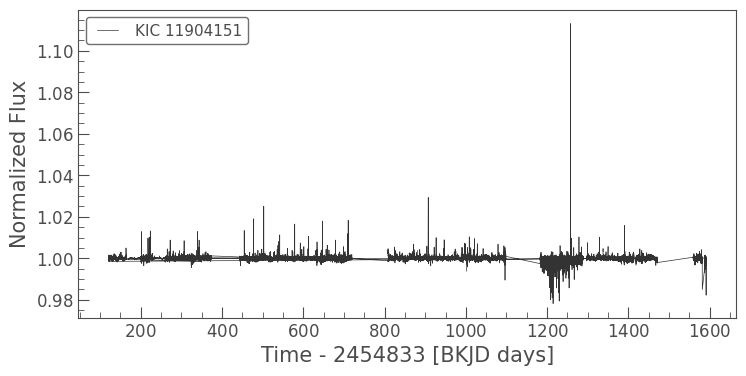

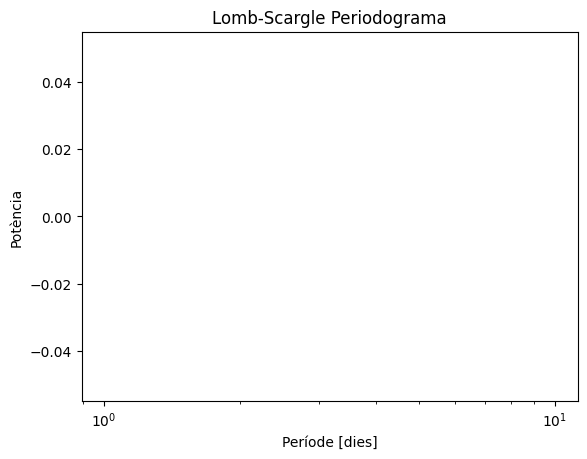

Els períodes més prominents (dies) són: [0.00038310613507390836, 0.001149316309180422, 0.0011493188244309034, 0.0011493190040920732, 0.0011493191837532995]


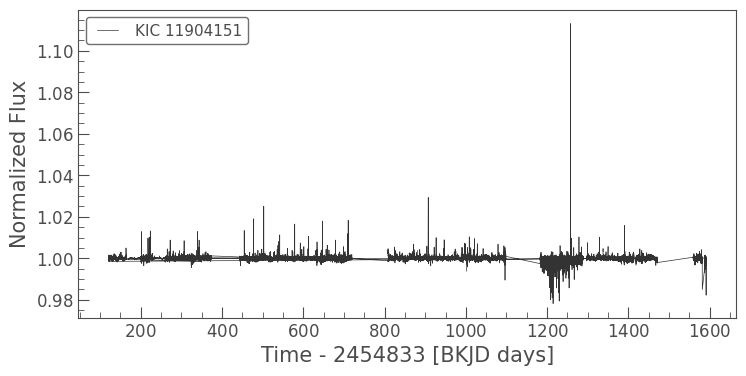

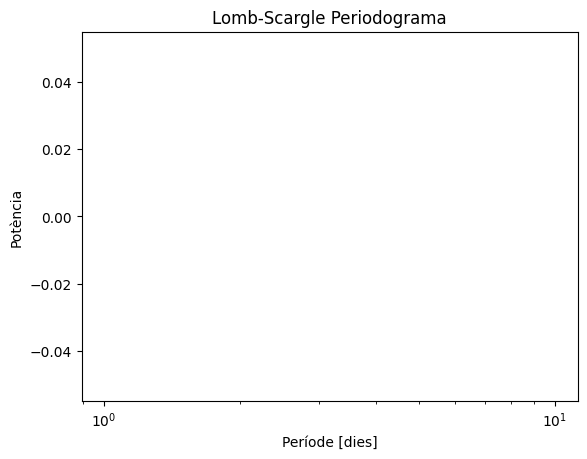

Els períodes més prominents (dies) són: [0.00038310613507390836, 0.001149316309180422, 0.0011493188244309034, 0.0011493190040920732, 0.0011493191837532995]


In [ ]:

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from IPython.display import display
import ipywidgets as widgets

# Funció per descarregar i analitzar la corba de llum
def download_and_analyze_lightcurve(exoplanet_name):
    try:
        # Cerca i descarrega la corba de llum
        search_result = lk.search_lightcurve(exoplanet_name, mission='Kepler')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='K2')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='TESS')
        if len(search_result) == 0:
            print("No s'han trobat dades per a l'exoplaneta especificat.")
            return

        lc_collection = search_result.download_all()
        if lc_collection is None:
            print("No s'han pogut descarregar les dades per a l'exoplaneta especificat.")
            return

        lc = lc_collection.stitch()

        # Representació de la corba de llum
        lc.plot()
        plt.show()

        # Transformada de Lomb-Scargle per detectar períodes
        frequency, power = LombScargle(lc.time.value, lc.flux.value).autopower()
        period = 1 / frequency
        plt.plot(period, power)
        plt.xscale('log')
        plt.xlabel('Període [dies]')
        plt.ylabel('Potència')
        plt.title('Lomb-Scargle Periodograma')
        plt.show()

        # Identificació dels períodes més prominents
        peak_periods = period[np.argsort(power)[-5:]]  # Els 5 períodes amb més potència
        peak_periods = sorted(peak_periods)

        print(f"Els períodes més prominents (dies) són: {peak_periods}")
    except Exception as e:
        print(f"Ha ocorregut un error: {e}")

# Interfície gràfica per introduir el nom de l'exoplaneta
exoplanet_name_textbox = widgets.Text(
    value='',
    placeholder='Introdueix el nom de l\'exoplaneta',
    description='Exoplaneta:',
    disabled=False
)

def on_button_clicked(b):
    exoplanet_name = exoplanet_name_textbox.value
    download_and_analyze_lightcurve(exoplanet_name)

button = widgets.Button(description="Obtenir corba de llum")
button.on_click(on_button_clicked)

display(exoplanet_name_textbox, button)

/usr/local/lib/python3.10/dist-packages/lightkurve/lightcurve.py:1131: LightkurveWarning: The light curve appears to be zero-centered (median=5.75e+05 electron / s +/- 1.17e+06 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


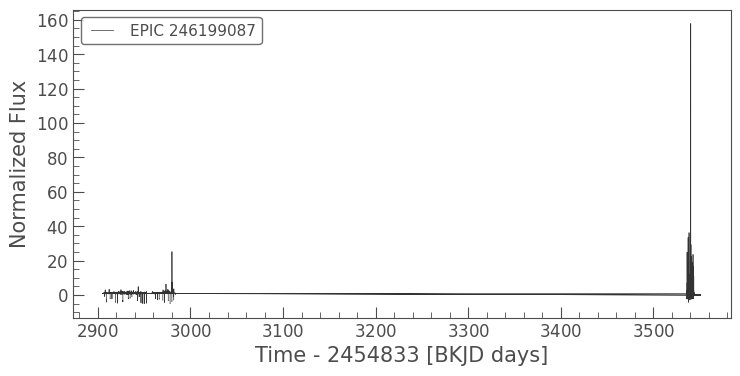

**Estadístiques bàsiques de la corba de llum:**

- Nombre de punts de dades: 132646

- Flux mitjà: 1.0240e+00

- Desviació estàndard del flux: 7.3190e-01

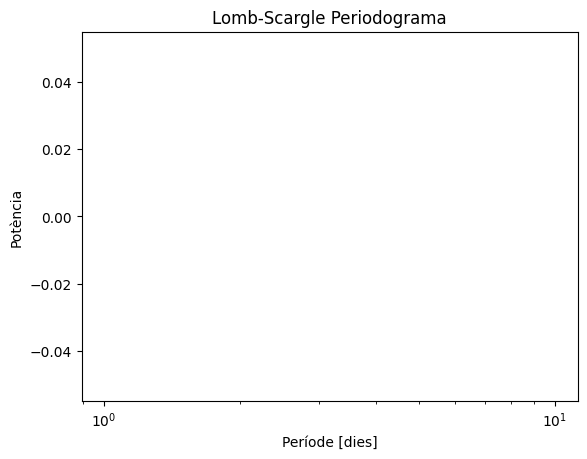

**Els períodes més prominents (dies) són:**

- Període: 0.0019 dies, Potència: nan

- Període: 0.0058 dies, Potència: nan

- Període: 0.0058 dies, Potència: nan

- Període: 0.0058 dies, Potència: nan

- Període: 0.0058 dies, Potència: nan

Text(value='', description='Exoplaneta:', placeholder="Introdueix el nom de l'exoplaneta")

Button(description='Obtenir corba de llum', style=ButtonStyle())

In [4]:

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from IPython.display import display, Markdown
import ipywidgets as widgets

# Funció per descarregar i analitzar la corba de llum
def download_and_analyze_lightcurve(exoplanet_name):
    try:
        # Cerca i descarrega la corba de llum
        search_result = lk.search_lightcurve(exoplanet_name, mission='Kepler')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='K2')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='TESS')
        if len(search_result) == 0:
            display(Markdown("**No s'han trobat dades per a l'exoplaneta especificat.**"))
            return

        lc_collection = search_result.download_all()
        if lc_collection is None:
            display(Markdown("**No s'han pogut descarregar les dades per a l'exoplaneta especificat.**"))
            return

        lc = lc_collection.stitch()

        # Representació de la corba de llum
        lc.plot()
        plt.show()

        # Estadístiques bàsiques
        mean_flux = np.mean(lc.flux)
        std_flux = np.std(lc.flux)
        num_data_points = len(lc.flux)

        display(Markdown(f"**Estadístiques bàsiques de la corba de llum:**"))
        display(Markdown(f"- Nombre de punts de dades: {num_data_points}"))
        display(Markdown(f"- Flux mitjà: {mean_flux:.4e}"))
        display(Markdown(f"- Desviació estàndard del flux: {std_flux:.4e}"))

        # Transformada de Lomb-Scargle per detectar períodes
        frequency, power = LombScargle(lc.time.value, lc.flux.value).autopower()
        period = 1 / frequency
        plt.plot(period, power)
        plt.xscale('log')
        plt.xlabel('Període [dies]')
        plt.ylabel('Potència')
        plt.title('Lomb-Scargle Periodograma')
        plt.show()

        # Identificació dels períodes més prominents
        peak_indices = np.argsort(power)[-5:]  # Els 5 períodes amb més potència
        peak_periods = period[peak_indices]
        peak_powers = power[peak_indices]

        sorted_peaks = sorted(zip(peak_periods, peak_powers), key=lambda x: x[0])

        display(Markdown(f"**Els períodes més prominents (dies) són:**"))
        for p, pow in sorted_peaks:
            display(Markdown(f"- Període: {p:.4f} dies, Potència: {pow:.4e}"))

    except Exception as e:
        display(Markdown(f"**Ha ocorregut un error: {e}**"))

# Interfície gràfica per introduir el nom de l'exoplaneta
exoplanet_name_textbox = widgets.Text(
    value='',
    placeholder='Introdueix el nom de l\'exoplaneta',
    description='Exoplaneta:',
    disabled=False
)

def on_button_clicked(b):
    exoplanet_name = exoplanet_name_textbox.value
    download_and_analyze_lightcurve(exoplanet_name)

button = widgets.Button(description="Obtenir corba de llum")
button.on_click(on_button_clicked)

display(exoplanet_name_textbox, button)

Text(value='', description='Exoplaneta:', placeholder="Introdueix el nom de l'exoplaneta")

Button(description='Obtenir corba de llum', style=ButtonStyle())

/usr/local/lib/python3.10/dist-packages/lightkurve/lightcurve.py:1131: LightkurveWarning: The light curve appears to be zero-centered (median=5.75e+05 electron / s +/- 1.17e+06 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


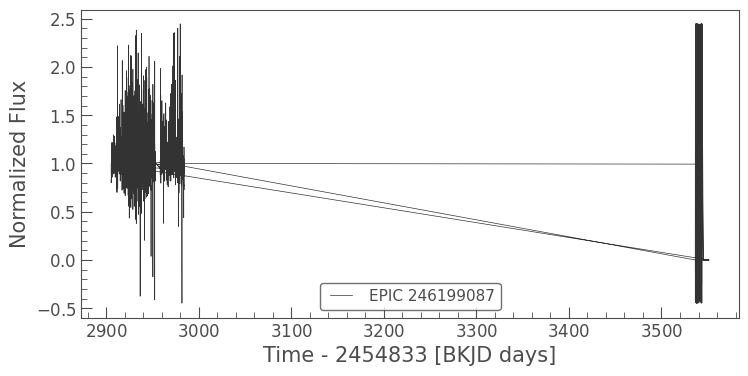

**Estadístiques bàsiques de la corba de llum:**

- Nombre de punts de dades: 129076

- Flux mitjà: 9.8719e-01

- Desviació estàndard del flux: 2.8091e-01

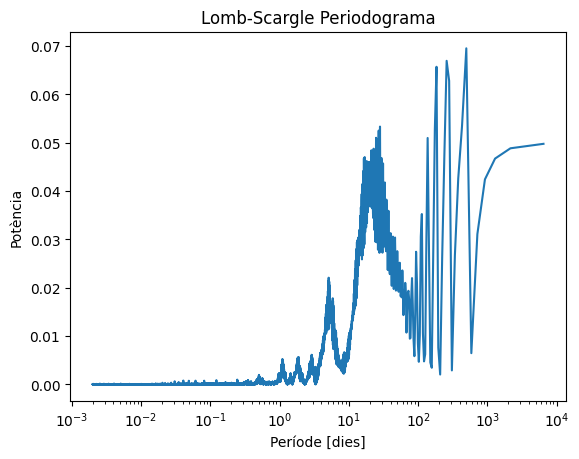

**Els períodes més prominents (dies) són:**

- Període: 184.5563 dies, Potència: 6.5727e-02

- Període: 258.3788 dies, Potència: 6.6963e-02

- Període: 280.8465 dies, Potència: 6.2817e-02

- Període: 430.6314 dies, Potència: 5.3413e-02

- Període: 496.8824 dies, Potència: 6.9549e-02

In [5]:

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from IPython.display import display, Markdown
import ipywidgets as widgets

# Funció per descarregar i analitzar la corba de llum
def download_and_analyze_lightcurve(exoplanet_name):
    try:
        # Cerca i descarrega la corba de llum
        search_result = lk.search_lightcurve(exoplanet_name, mission='Kepler')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='K2')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='TESS')
        if len(search_result) == 0:
            display(Markdown("**No s'han trobat dades per a l'exoplaneta especificat.**"))
            return

        lc_collection = search_result.download_all()
        if lc_collection is None:
            display(Markdown("**No s'han pogut descarregar les dades per a l'exoplaneta especificat.**"))
            return

        lc = lc_collection.stitch()

        # Neteja i normalització de la corba de llum
        lc = lc.remove_nans().normalize().remove_outliers(sigma=5)

        # Representació de la corba de llum
        lc.plot()
        plt.show()

        # Estadístiques bàsiques
        mean_flux = np.mean(lc.flux)
        std_flux = np.std(lc.flux)
        num_data_points = len(lc.flux)

        display(Markdown(f"**Estadístiques bàsiques de la corba de llum:**"))
        display(Markdown(f"- Nombre de punts de dades: {num_data_points}"))
        display(Markdown(f"- Flux mitjà: {mean_flux:.4e}"))
        display(Markdown(f"- Desviació estàndard del flux: {std_flux:.4e}"))

        # Transformada de Lomb-Scargle per detectar períodes
        frequency, power = LombScargle(lc.time.value, lc.flux.value).autopower()
        period = 1 / frequency
        plt.plot(period, power)
        plt.xscale('log')
        plt.xlabel('Període [dies]')
        plt.ylabel('Potència')
        plt.title('Lomb-Scargle Periodograma')
        plt.show()

        # Identificació dels períodes més prominents
        peak_indices = np.argsort(power)[-5:]  # Els 5 períodes amb més potència
        peak_periods = period[peak_indices]
        peak_powers = power[peak_indices]

        sorted_peaks = sorted(zip(peak_periods, peak_powers), key=lambda x: x[0])

        display(Markdown(f"**Els períodes més prominents (dies) són:**"))
        for p, pow in sorted_peaks:
            display(Markdown(f"- Període: {p:.4f} dies, Potència: {pow:.4e}"))

    except Exception as e:
        display(Markdown(f"**Ha ocorregut un error: {e}**"))

# Interfície gràfica per introduir el nom de l'exoplaneta
exoplanet_name_textbox = widgets.Text(
    value='',
    placeholder='Introdueix el nom de l\'exoplaneta',
    description='Exoplaneta:',
    disabled=False
)

def on_button_clicked(b):
    exoplanet_name = exoplanet_name_textbox.value
    download_and_analyze_lightcurve(exoplanet_name)

button = widgets.Button(description="Obtenir corba de llum")
button.on_click(on_button_clicked)

display(exoplanet_name_textbox, button)